### Horseshor prior:

In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot
include("/home/postdoc/dsen/Desktop/codes/G-ZZ_clean/jl_files/zz_samplers.jl")
include("/home/postdoc/dsen/Desktop/codes/G-ZZ_clean/jl_files/mbsampler.jl")

get_clustering (generic function with 1 method)

In [2]:
d, Nobs = 20, 50
X = randn(d, Nobs)
X[1,:] = ones(Nobs)
ξ_true = rand(Normal(),d).* rand(Binomial(1,0.5), d)
ξ_true[1] = rand(Normal())
y = [rand(Binomial(1, 1/(1+exp(-ξ_true'X[:,j])))) + 0. for j in 1:Nobs];
σ02 = 1;

In [3]:
prior = HS_prior(d, σ02);
my_ll = ll_logistic_sp(X,y);
my_model = model(my_ll, prior);

In [4]:
ξ0 = zeros(d)
stepsize = 1e-2
n_leapfrog = 30
n_mcmc = 10^4
adapt = true

xi_samples, hyper_samples, acc = GibbsHMC(my_model, ξ0, stepsize, n_leapfrog, n_mcmc, adapt);

10 percent steps in 0.5 min; HMC acceptance = 90 percent 
20 percent steps in 1.0 min; HMC acceptance = 90 percent 
30 percent steps in 1.4 min; HMC acceptance = 78 percent 
40 percent steps in 1.9 min; HMC acceptance = 73 percent 
50 percent steps in 2.3 min; HMC acceptance = 69 percent 
60 percent steps in 2.8 min; HMC acceptance = 67 percent 
70 percent steps in 3.3 min; HMC acceptance = 65 percent 
80 percent steps in 3.7 min; HMC acceptance = 64 percent 
90 percent steps in 4.2 min; HMC acceptance = 63 percent 
100 percent steps in 4.6 min; HMC acceptance = 63 percent 


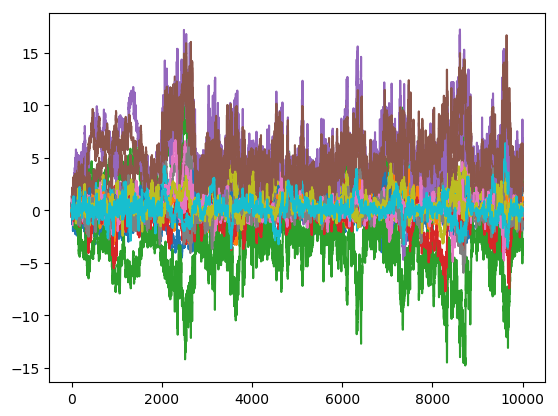

In [5]:
for i in 1:size(xi_samples,1)
    plot(xi_samples[i,:]) 
end

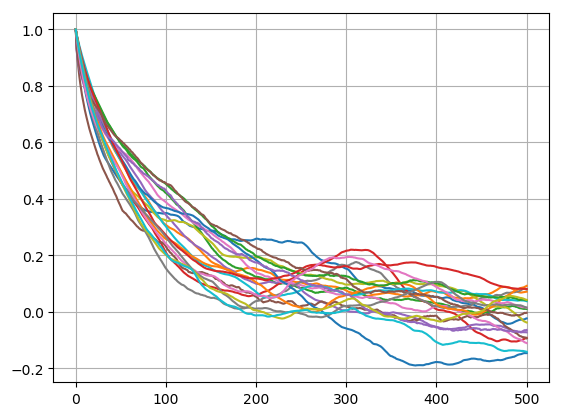

In [6]:
for i in 1:size(xi_samples,1) 
    plot(acf(xi_samples[i,:], 500))
end
grid(true)

* Configuration temperature should be around 1.

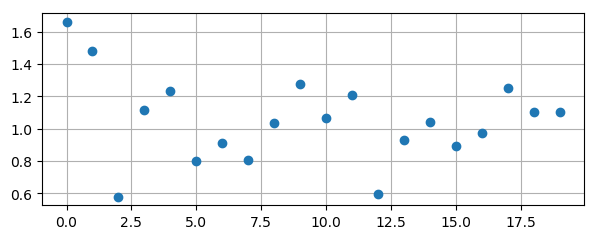

In [7]:
fig = figure("pyplot_barplot",figsize=(7,2.5))
plot([compute_configT(my_model, xi_samples, hyper_samples, k) for k in 1:d], "o")
grid(true)

In [26]:
maxlag = 500
acf_xi = zeros(size(xi_samples,1),maxlag+1)
for i in 1:size(xi_samples,1) 
    acf_xi[i,:] = acf(xi_samples[i,:], maxlag)
end

In [27]:
maximum(sum(acf_xi,2))

141.07222741620893

In [30]:
diag(Diagonal(rand(10)))

10-element Array{Float64,1}:
 0.101224 
 0.29346  
 0.0274077
 0.551344 
 0.411107 
 0.70171  
 0.259804 
 0.258308 
 0.814535 
 0.0763946